In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta, time

In [1]:
area_path = '../dataset/area_work/'
path_to_facility= '../dataset/facility_timing/'

In [2]:
sat_name = '112004'

In [5]:
# Read visibility to facilites data
dfs = []
for path, subdirs, files in os.walk(path_to_facility):
    for name in files:
        if sat_name in name:
            facility_csv_path = os.path.join(path, name)
            df = pd.read_csv(facility_csv_path, index_col=0)
            df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['facility'] = name.split('-To-')[0]
            df['sat_name'] = sat_name
            dfs.append(df)

facilities_df = pd.concat(dfs)

In [6]:
# Read area data
dfs = []
for path, subdirs, files in os.walk(area_path):
    for name in files:
        if sat_name in name:
            area_csv_path = os.path.join(path, name)
            df = pd.read_csv(area_csv_path, index_col=0)
            df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['sat_name'] = sat_name
            dfs.append(df)

area_df = pd.concat(dfs)

In [7]:
area_df = area_df.sort_values(by=['Start Time (UTCG)'])
area_df.reset_index(inplace=True, drop=True)

facilities_df = facilities_df.sort_values(by=['Start Time (UTCG)'])
facilities_df.reset_index(inplace=True, drop=True)

In [8]:
facilities_df

,Start Time (UTCG),Stop Time (UTCG),Duration (sec),facility,sat_name
0,2027-06-01 00:00:01.000,2027-06-01 00:03:40.884,219.884,Magadan2,112004
1,2027-06-01 00:00:01.000,2027-06-01 00:03:28.515,207.515,Irkutsk,112004
2,2027-06-01 00:00:01.000,2027-06-01 00:03:40.884,219.884,Magadan1,112004
3,2027-06-01 00:12:17.708,2027-06-01 00:17:53.118,335.410,Sumatra,112004
4,2027-06-01 00:42:45.027,2027-06-01 00:54:48.482,723.455,RioGallegos,112004
...,...,...,...,...,...
1600,2027-06-13 23:13:14.513,2027-06-13 23:25:10.347,715.833,Anadyr2,112004
1601,2027-06-13 23:13:14.513,2027-06-13 23:25:10.347,715.833,Anadyr1,112004
1602,2027-06-13 23:15:30.518,2027-06-13 23:28:25.529,775.011,Magadan2,112004
1603,2027-06-13 23:15:30.518,2027-06-13 23:28:25.529,775.011,Magadan1,112004


In [9]:
area_df

,Start Time (UTCG),Stop Time (UTCG),Duration (sec),sat_name
0,2027-06-01 03:06:25.068,2027-06-01 03:14:11.468,466.400,112004
1,2027-06-01 04:43:39.164,2027-06-01 04:43:43.879,4.715,112004
2,2027-06-01 04:44:00.277,2027-06-01 04:49:29.679,329.403,112004
3,2027-06-01 06:22:21.282,2027-06-01 06:29:03.234,401.953,112004
4,2027-06-01 07:46:28.819,2027-06-01 07:48:23.539,114.720,112004
...,...,...,...,...
103,2027-06-13 07:11:16.549,2027-06-13 07:11:54.562,38.013,112004
104,2027-06-13 07:12:24.098,2027-06-13 07:14:51.964,147.866,112004
105,2027-06-13 08:35:25.713,2027-06-13 08:37:54.211,148.498,112004
106,2027-06-13 10:11:09.741,2027-06-13 10:14:41.728,211.988,112004


In [10]:
filtered_facilities_df = facilities_df.copy()

for _, area_row in area_df.iterrows():
    cut_start = area_row['Start Time (UTCG)']
    cut_stop = area_row['Stop Time (UTCG)']
    new_df = pd.DataFrame(columns=filtered_facilities_df.columns)
    for index, facility_row in filtered_facilities_df.iterrows():
        start_time_facility = facility_row['Start Time (UTCG)']
        stop_time_facility = facility_row['Stop Time (UTCG)']
        if max(cut_start, start_time_facility) < min(cut_stop, stop_time_facility):
            alt_row = facility_row.copy()
            if start_time_facility < cut_start:
                facility_row['Stop Time (UTCG)'] = cut_start
                new_df = pd.concat([new_df, facility_row.to_frame(1).T], ignore_index=True)
            if stop_time_facility > cut_stop:
                alt_row['Start Time (UTCG)'] = cut_stop
                new_df = pd.concat([new_df, alt_row.to_frame(1).T], ignore_index=True)
        else:
            new_df = pd.concat([new_df, facility_row.to_frame(1).T], ignore_index=True)
    filtered_facilities_df = new_df.copy()

In [11]:
filtered_facilities_df

,Start Time (UTCG),Stop Time (UTCG),Duration (sec),facility,sat_name
0,2027-06-01 00:00:01.000,2027-06-01 00:03:40.884,219.884,Magadan2,112004
1,2027-06-01 00:00:01.000,2027-06-01 00:03:28.515,207.515,Irkutsk,112004
2,2027-06-01 00:00:01.000,2027-06-01 00:03:40.884,219.884,Magadan1,112004
3,2027-06-01 00:12:17.708,2027-06-01 00:17:53.118,335.41,Sumatra,112004
4,2027-06-01 00:42:45.027,2027-06-01 00:54:48.482,723.455,RioGallegos,112004
...,...,...,...,...,...
1994,2027-06-13 23:13:14.513,2027-06-13 23:25:10.347,715.833,Anadyr2,112004
1995,2027-06-13 23:13:14.513,2027-06-13 23:25:10.347,715.833,Anadyr1,112004
1996,2027-06-13 23:15:30.518,2027-06-13 23:28:25.529,775.011,Magadan2,112004
1997,2027-06-13 23:15:30.518,2027-06-13 23:28:25.529,775.011,Magadan1,112004


In [85]:
area_df

,Start Time (UTCG),Stop Time (UTCG),Duration (sec),sat_name
0,2027-06-01 09:46:51.002,2027-06-01 09:52:36.364,345.363,111603
1,2027-06-01 09:52:37.524,2027-06-01 09:53:38.951,61.427,111603
2,2027-06-01 11:23:11.938,2027-06-01 11:29:33.792,381.854,111603
3,2027-06-01 13:00:45.544,2027-06-01 13:05:07.811,262.268,111603
4,2027-06-01 14:36:49.173,2027-06-01 14:41:00.961,251.788,111603
...,...,...,...,...
75,2027-06-13 12:11:33.065,2027-06-13 12:16:47.503,314.437,111603
76,2027-06-13 12:16:50.059,2027-06-13 12:17:47.806,57.747,111603
77,2027-06-13 12:17:51.974,2027-06-13 12:18:10.510,18.536,111603
78,2027-06-13 13:49:36.192,2027-06-13 13:53:45.861,249.668,111603


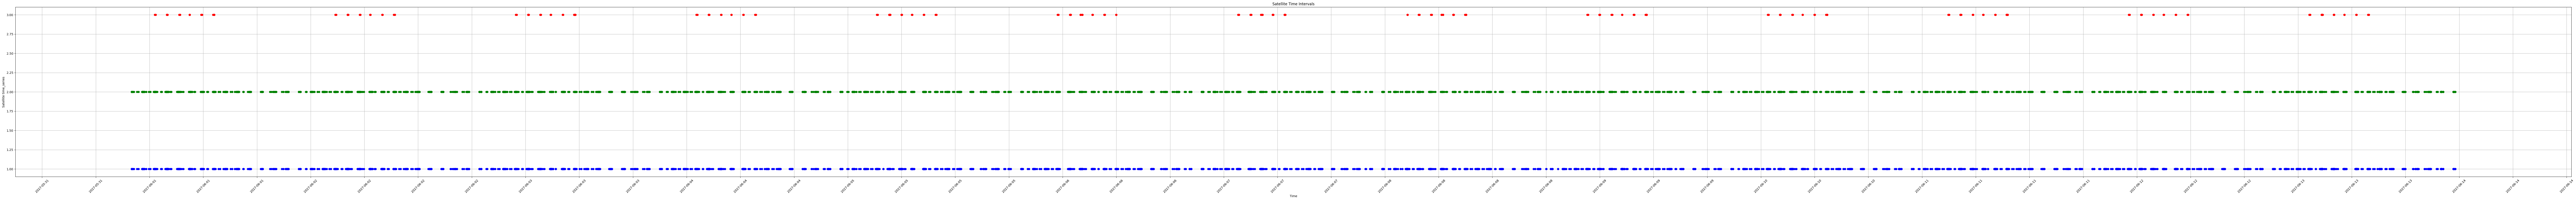

In [13]:
# Set the figure size
plt.figure(figsize=(150, 10))

facility_name = 'Moscow'

# Plot the time intervals as a line plot with unique colors
for i, row in area_df.iterrows():
    sat_name = 3
    plt.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [sat_name, sat_name], marker='o', color='r')

for i, row in facilities_df.iterrows():
    sat_name = 2
    # if row['facility'] == facility_name:
    plt.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [sat_name, sat_name], marker='o', color='g')

for i, row in filtered_facilities_df.iterrows():
    sat_name = 1
    # if row['facility'] == facility_name:
    plt.plot([row['Start Time (UTCG)'], row['Stop Time (UTCG)']], [sat_name, sat_name], marker='o', color='b')

# Set the y-axis labels as satellite names

# Set x-axis and y-axis labels
plt.xlabel('Time')
plt.ylabel('Satellite time_series')

# Set the title of the plot
plt.title('Satellite Time Intervals')

# Increase tick rate on x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))

# plt.xlim([datetime(2027, 6, 1, 9, 0, 0), datetime(2027, 6, 1, 18, 0, 0)])
plt.grid()
# Display the plot
plt.show()

In [14]:
area_path = '../dataset/area_work/'

In [24]:
dfs = []
for path, subdirs, files in os.walk(area_path):
    for name in files:
        if 'Kino' in name:
            csv_path = os.path.join(path, name)
            sat_name = name.split('.')[0]
            df = pd.read_csv(csv_path)
            df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df_working = df.copy()
            sum_time_by_day = df_working.groupby(df_working['Start Time (UTCG)'].dt.date)['Duration (sec)'].sum()
            sum_time_by_day.to_dict()
            final = pd.DataFrame(sum_time_by_day.to_dict(), index=[sat_name,])
            dfs.append(final)

df_final_kino = pd.concat(dfs)

In [25]:
df_final_kino

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
KinoSat_110509,1534.509,1595.659,1850.655,1941.267,1991.092,1819.795,1608.355,1454.862,1534.440,1596.601,1854.820,1941.258,1990.593
KinoSat_110508,1595.665,1785.370,1907.088,2012.761,1851.052,1655.807,1429.388,1540.933,1599.219,1786.248,1912.919,2012.521,1849.899
KinoSat_110505,1977.075,1897.298,1781.112,1545.592,1514.941,1542.019,1601.463,1839.802,1982.867,1897.311,1782.008,1542.953,1514.922
KinoSat_110510,1514.908,1543.920,1601.264,1840.074,1982.072,1897.363,1782.649,1545.313,1514.936,1536.620,1601.923,1839.388,1979.729
KinoSat_110504,1991.989,1813.909,1609.345,1448.180,1534.474,1596.163,1850.460,1941.159,1990.629,1811.305,1684.546,1461.497,1534.367
KinoSat_110506,1860.582,1998.676,1919.177,1745.550,1517.878,1518.502,1527.112,1634.123,1862.844,1999.461,1903.990,1744.860,1518.682
KinoSat_110507,1768.449,1870.575,1980.463,1947.409,1694.798,1515.857,1518.131,1558.440,1772.449,1872.181,1986.369,1946.743,1694.249
KinoSat_110503,1919.378,1656.906,1430.198,1541.031,1596.189,1785.638,1911.975,2012.665,1850.499,1652.141,1428.480,1541.438,1599.728
KinoSat_110502,1694.981,1517.657,1518.065,1558.214,1770.721,1871.445,1986.189,1947.137,1694.602,1514.832,1519.006,1558.530,1773.633
KinoSat_110501,1536.367,1518.471,1527.067,1632.871,1862.297,1999.089,1905.040,1745.253,1518.697,1518.490,1527.233,1635.265,1860.246


In [27]:
dfs = []
for path, subdirs, files in os.walk(area_path):
    for name in files:
        if 'Zorky' in name:
            csv_path = os.path.join(path, name)
            sat_name = name.split('.')[0]
            df = pd.read_csv(csv_path)
            df['Start Time (UTCG)'] = pd.to_datetime(df['Start Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df['Stop Time (UTCG)'] = pd.to_datetime(df['Stop Time (UTCG)'], format='%d %b %Y %H:%M:%S.%f')
            df_working = df.copy()
            sum_time_by_day = df_working.groupby(df_working['Start Time (UTCG)'].dt.date)['Duration (sec)'].sum()
            sum_time_by_day.to_dict()
            final = pd.DataFrame(sum_time_by_day.to_dict(), index=[sat_name,])
            dfs.append(final)

df_final_zorky = pd.concat(dfs)

In [28]:
df_final_zorky

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
ZorkySat_111308,1925.849,2173.561,2241.440,1948.966,1820.191,1657.427,1364.350,1475.662,1946.022,2180.656,2236.831,1945.829,1822.048
ZorkySat_111309,1499.817,2037.354,2232.189,2249.960,1908.516,1833.020,1663.020,1356.701,1503.274,2038.911,2234.065,2246.236,1896.306
ZorkySat_111310,1349.867,1576.697,2066.966,2223.064,2151.904,1893.851,1794.051,1675.428,1358.920,1564.053,2080.241,2228.693,2028.801
ZorkySat_111304,1907.948,1831.536,1663.269,1364.811,1501.811,2035.793,2238.204,2248.176,1896.961,1831.065,1662.547,1361.392,1505.377
ZorkySat_111305,2221.494,1898.392,1802.444,1675.047,1354.847,1561.654,2069.228,2224.957,2152.144,1891.660,1791.738,1676.456,1362.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZorkySat_111605,1879.676,1911.850,1748.978,1683.314,1970.643,1691.530,1827.212,2177.337,1857.183,1898.403,1757.101,1706.068,1987.172
ZorkySat_111610,1973.610,1691.263,1824.922,2170.610,1858.975,1904.145,1773.678,1697.334,1972.216,1691.944,1828.349,2108.266,1855.494
ZorkySat_111604,1912.321,1755.848,1706.458,1902.272,1668.191,1807.191,2149.208,1873.374,1913.291,1761.899,1701.823,1927.960,1668.616
ZorkySat_111606,1934.389,1848.020,1858.157,1751.838,1726.860,1951.148,1683.990,1841.667,1920.399,1876.541,1783.714,1747.980,1732.521


In [29]:
for col in df_final_zorky.columns:
    df_final_zorky[col] = df_final_zorky[col].apply(lambda x: x * 4 / 8192)

In [30]:
for col in df_final_kino.columns:
    df_final_kino[col] = df_final_kino[col].apply(lambda x: x * 4 / 8192)

In [32]:
df_final_zorky

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
ZorkySat_111308,0.940356,1.061309,1.094453,0.951644,0.888765,0.809291,0.666187,0.720538,0.950206,1.064773,1.092203,0.950112,0.889672
ZorkySat_111309,0.732333,0.994802,1.089936,1.098613,0.931893,0.895029,0.812021,0.662452,0.734021,0.995562,1.090852,1.096795,0.925931
ZorkySat_111310,0.659115,0.769872,1.009261,1.085480,1.050734,0.924732,0.876001,0.818080,0.663535,0.763698,1.015743,1.088229,0.990625
ZorkySat_111304,0.931615,0.894305,0.812143,0.666412,0.733306,0.994040,1.092873,1.097742,0.926250,0.894075,0.811791,0.664742,0.735047
ZorkySat_111305,1.084714,0.926949,0.880100,0.817894,0.661546,0.762526,1.010365,1.086405,1.050852,0.923662,0.874872,0.818582,0.665083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZorkySat_111605,0.917811,0.933521,0.853993,0.821931,0.962228,0.825942,0.892193,1.063153,0.906828,0.926955,0.857959,0.833041,0.970299
ZorkySat_111610,0.963677,0.825812,0.891075,1.059868,0.907703,0.929758,0.866054,0.828776,0.962996,0.826145,0.892749,1.029427,0.906003
ZorkySat_111604,0.933750,0.857348,0.833231,0.928844,0.814546,0.882417,1.049418,0.914733,0.934224,0.860302,0.830968,0.941387,0.814754
ZorkySat_111606,0.944526,0.902354,0.907303,0.855390,0.843193,0.952709,0.822261,0.899251,0.937695,0.916280,0.870954,0.853506,0.845958


In [33]:
df_all = pd.concat([df_final_kino, df_final_zorky])

In [34]:
df_all

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
KinoSat_110509,0.749272,0.779130,0.903640,0.947884,0.972213,0.888572,0.785330,0.710382,0.749238,0.779590,0.905674,0.947880,0.971969
KinoSat_110508,0.779133,0.871763,0.931195,0.982793,0.903834,0.808500,0.697943,0.752409,0.780869,0.872191,0.934042,0.982676,0.903271
KinoSat_110505,0.965369,0.926415,0.869684,0.754684,0.739717,0.752939,0.781964,0.898341,0.968197,0.926421,0.870121,0.753395,0.739708
KinoSat_110510,0.739701,0.753867,0.781867,0.898474,0.967809,0.926447,0.870434,0.754547,0.739715,0.750303,0.782189,0.898139,0.966665
KinoSat_110504,0.972651,0.885698,0.785813,0.707119,0.749255,0.779376,0.903545,0.947832,0.971987,0.884426,0.822532,0.713622,0.749203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZorkySat_111605,0.917811,0.933521,0.853993,0.821931,0.962228,0.825942,0.892193,1.063153,0.906828,0.926955,0.857959,0.833041,0.970299
ZorkySat_111610,0.963677,0.825812,0.891075,1.059868,0.907703,0.929758,0.866054,0.828776,0.962996,0.826145,0.892749,1.029427,0.906003
ZorkySat_111604,0.933750,0.857348,0.833231,0.928844,0.814546,0.882417,1.049418,0.914733,0.934224,0.860302,0.830968,0.941387,0.814754
ZorkySat_111606,0.944526,0.902354,0.907303,0.855390,0.843193,0.952709,0.822261,0.899251,0.937695,0.916280,0.870954,0.853506,0.845958


In [35]:
sums_time_of_recording = df_all.sum().to_dict()

In [36]:
sums_time_of_recording

{datetime.date(2027, 6, 1): 168.333779296875,
 datetime.date(2027, 6, 2): 168.8570615234375,
 datetime.date(2027, 6, 3): 168.9516259765625,
 datetime.date(2027, 6, 4): 168.78832177734375,
 datetime.date(2027, 6, 5): 168.144,
 datetime.date(2027, 6, 6): 169.00721728515626,
 datetime.date(2027, 6, 7): 168.94480078125002,
 datetime.date(2027, 6, 8): 168.72710742187502,
 datetime.date(2027, 6, 9): 168.33928857421876,
 datetime.date(2027, 6, 10): 168.94818212890624,
 datetime.date(2027, 6, 11): 168.9060400390625,
 datetime.date(2027, 6, 12): 168.764998046875,
 datetime.date(2027, 6, 13): 168.29509326171873}

In [37]:
df_all.describe()

,2027-06-01,2027-06-02,2027-06-03,2027-06-04,2027-06-05,2027-06-06,2027-06-07,2027-06-08,2027-06-09,2027-06-10,2027-06-11,2027-06-12,2027-06-13
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.841669,0.844285,0.844758,0.843942,0.840720,0.845036,0.844724,0.843636,0.841696,0.844741,0.844530,0.843825,0.841475
std,0.146525,0.146363,0.146979,0.147033,0.146385,0.146119,0.146802,0.147351,0.146027,0.146393,0.146811,0.147648,0.146113
min,0.438342,0.446617,0.436450,0.439580,0.438563,0.451688,0.436345,0.439404,0.438774,0.451429,0.436847,0.439289,0.439012
25%,0.749709,0.749945,0.745470,0.752703,0.747085,0.749957,0.745527,0.753377,0.748804,0.751591,0.745230,0.753323,0.749125
50%,0.849933,0.857623,0.864051,0.854440,0.850411,0.860434,0.864132,0.854769,0.853922,0.859799,0.858417,0.854396,0.852008
75%,0.943414,0.951179,0.944892,0.947323,0.943709,0.950688,0.944058,0.948193,0.944909,0.947695,0.947599,0.946652,0.945406
max,1.126173,1.114108,1.110797,1.124705,1.115506,1.114248,1.107911,1.124808,1.117436,1.107403,1.107151,1.126266,1.114156
